In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# lattice spacing given by d
d = 0.28
# distance between two lattice
w = (np.sqrt(3)*d)/2
print(w)
# distance between two unit cells vertically 
h = (3/2)*d

0.24248711305964282


In [3]:
# number of lattice sites in both directions
N = 4
a = N * d
b = N * w
print(a,b)

1.12 0.9699484522385713


In [4]:
# build hexagonal lattice
xcoords = np.array([])
ycoords = np.array([])

y_shift = 0
while y_shift < b:
    x = np.array([0])
    x_shift = 0 + d
    count = 0
    
    while x_shift < a:
        x = np.append(x, x_shift)
        x_shift = x_shift + d
        count += 1
    
    y = np.array([y_shift])
       
    for i in range(0, count):
        y = np.append(y, y_shift)
    
    y_shift = y_shift + 2*w
    xcoords = np.append(xcoords, x)
    ycoords = np.append(ycoords, y)

y_shift = 0 + w
while y_shift < b:
    x = np.array([0 + d/2])
    x_shift = 0 + d/2 + d
    count = 0
    
    while x_shift < a:
        x = np.append(x, x_shift)
        x_shift = x_shift + d
        count += 1
    
    y = np.array([y_shift])
       
    for i in range(0, count):
        y = np.append(y, y_shift)
    
    y_shift = y_shift + np.sqrt(3)*d
    xcoords = np.append(xcoords, x)
    ycoords = np.append(ycoords, y)
      

In [36]:
# assign random energie states to grid
state = np.random.uniform(0, 0.5, (N*N))
print(state)

[0.0723594  0.00847062 0.25072346 0.05373004 0.08418328 0.48178406
 0.4972346  0.44846865 0.06315303 0.32489063 0.31841132 0.05102843
 0.09021633 0.01276634 0.27079224 0.24273969]


In [37]:
grid = np.column_stack((xcoords, ycoords))
print(grid)

[[0.         0.        ]
 [0.28       0.        ]
 [0.56       0.        ]
 [0.84       0.        ]
 [0.         0.48497423]
 [0.28       0.48497423]
 [0.56       0.48497423]
 [0.84       0.48497423]
 [0.14       0.24248711]
 [0.42       0.24248711]
 [0.7        0.24248711]
 [0.98       0.24248711]
 [0.14       0.72746134]
 [0.42       0.72746134]
 [0.7        0.72746134]
 [0.98       0.72746134]]


In [39]:
number_of_sites = N*N
#determine random point on grid
a = np.random.randint(0, number_of_sites)
point = grid[a]
print(point)

[0.56 0.  ]


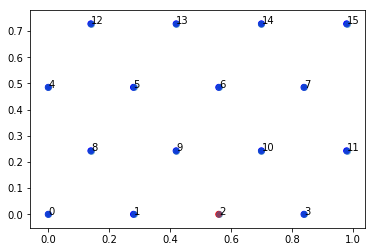

In [40]:
# plot hexagonal latticie showing point
def pltcolor(x, y):
    cols = []
    for i in range(number_of_sites):
        if x[i] == point[0] and y[i] == point[1] :
            cols.append('red')
        else:
            cols.append('blue')
    return cols

cols  = pltcolor(xcoords, ycoords)
plt.scatter(xcoords, ycoords, c=cols)

plt.scatter(grid[:,0],grid[:,1], alpha = 0.5)
for i in range(grid.shape[0]):
    plt.text(grid[i,0], grid[i,1], str(i))

plt.show()

In [41]:
# Temperature
T = 350
# Boltzmann constant
kB = 8.617332e-5
kT = kB * T

# calculate distance between lattice points and original points to find neighbbouring atoms
for n in range(20):
    neighbour_sites = np.array([])
    E = np.array([])
    for i in [x for x in range(number_of_sites) if x != a]:
        x_dis = grid[i][0] - point[0]
        y_dis = grid[i][1] - point[1]
        tot_dis = np.sqrt((x_dis**2) + (y_dis**2))
        if tot_dis <= d:
            neighbour_sites = np.append(neighbour_sites, i)
            E = np.append(E, state[i])
            dE = E - state[a]
            # rate of hopping, v = 1*exp(-dE/kT)
            v =  np.exp(-dE/kT)
            # generate random number
            Randnum = random.uniform(0,1)
            # set position of pointer
            rk = Randnum * np.sum(v)
            # cumulative sum of energy
            k = np.cumsum(v) 

    # going through k1, k1+k2...., ktotal
    check = []
    for i in np.nditer(k):
    # if value smaller than pointer, append to check
        if i < rk:
            check.append(i)

    if len(check) == 0:
        a = int(neighbour_sites[0])
    elif len(check) == 1:
        a = int(neighbour_sites[1])
    elif len(check) == 2:
        a = int(neighbour_sites[2])
    elif len(check) == 3:
        a = int(neighbour_sites[3])
    elif len(check) == 4:
        a = int(neighbour_sites[4])
    else:
        a = int(neighbour_sites[5])
    point = grid[a]

    print(a)

1
0
1
8
1
8
1
0
1
8
4
12
13
12
13
12
13
12
13
12
